### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns # Opcional, pero hace los gráficos mucho más bonitos

# Agregamos una columna para identificar de qué tienda viene cada venta
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Unimos todo en un solo DataFrame general
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Verificamos que se haya unido bien
df_total.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


     Tienda        Precio
0  Tienda 1  1.150880e+09
1  Tienda 2  1.116344e+09
2  Tienda 3  1.098020e+09
3  Tienda 4  1.038376e+09


/tmp/ipython-input-4084994183.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=facturacion_tienda, x='Tienda', y='Precio', palette='viridis')


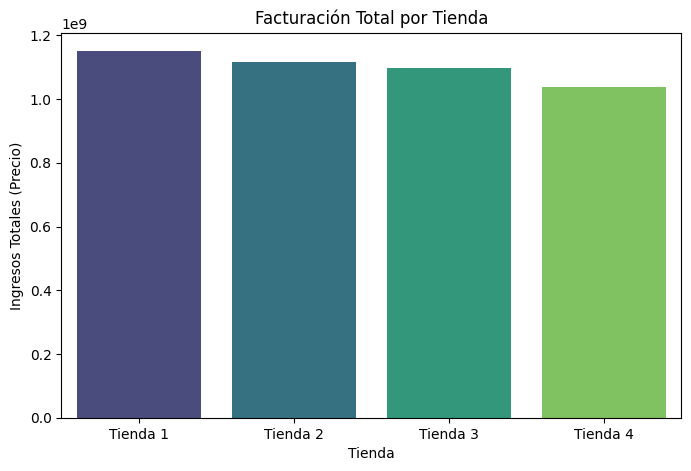

In [5]:
# Calculamos la facturación total por tienda
facturacion_tienda = df_total.groupby('Tienda')['Precio'].sum().reset_index()
facturacion_tienda = facturacion_tienda.sort_values(by='Precio', ascending=False)

print(facturacion_tienda)

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=facturacion_tienda, x='Tienda', y='Precio', palette='viridis')
plt.title('Facturación Total por Tienda')
plt.ylabel('Ingresos Totales (Precio)')
plt.show()

# 2. Ventas por categoría

Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: count, dtype: int64


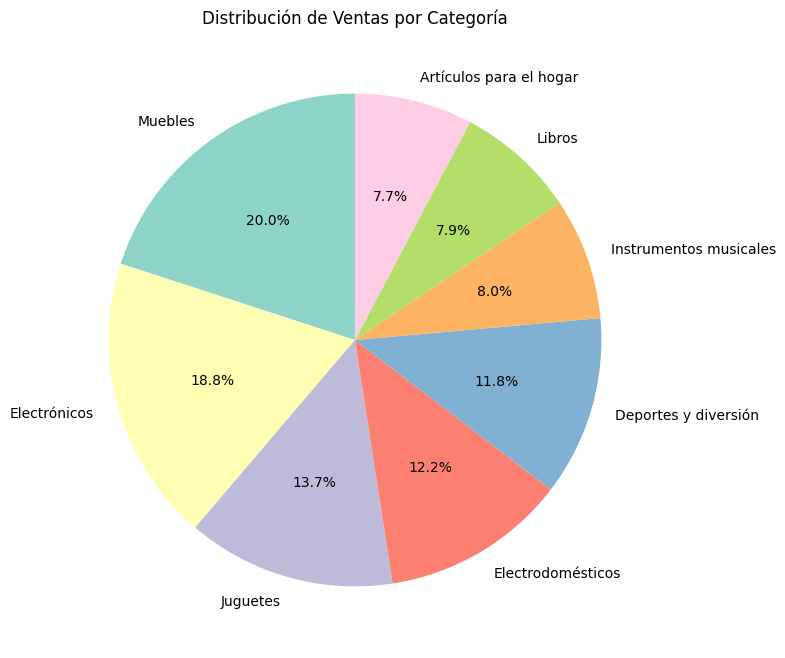

In [8]:
# Contamos las ventas por categoría
ventas_categoria = df_total['Categoría del Producto'].value_counts()
print(ventas_categoria)

# Obtenemos una paleta de colores de Seaborn del tamaño de nuestras categorías
colores = sns.color_palette('Set3', len(ventas_categoria))

# Gráfico circular (Pie chart) corregido
plt.figure(figsize=(8, 8))
plt.pie(ventas_categoria, labels=ventas_categoria.index, autopct='%1.1f%%', startangle=90, colors=colores)
plt.title('Distribución de Ventas por Categoría')
plt.show()

# 3. Calificación promedio de la tienda


     Tienda  Calificación
2  Tienda 3      4.048326
1  Tienda 2      4.037304
3  Tienda 4      3.995759
0  Tienda 1      3.976685


/tmp/ipython-input-1408051720.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=calificacion_tienda, x='Tienda', y='Calificación', palette='coolwarm')


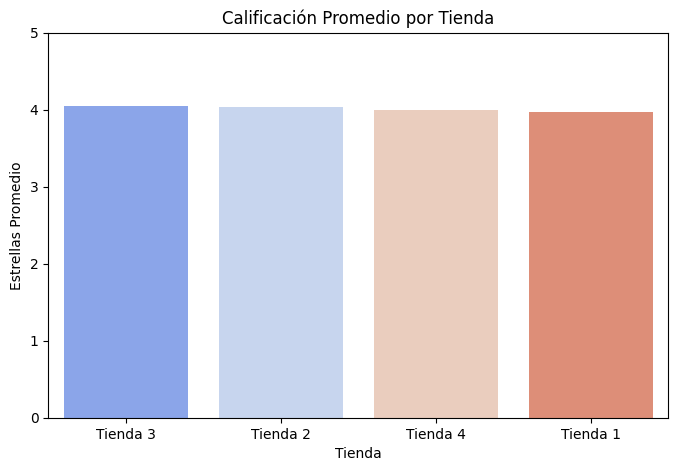

In [9]:
calificacion_tienda = df_total.groupby('Tienda')['Calificación'].mean().reset_index()
calificacion_tienda = calificacion_tienda.sort_values(by='Calificación', ascending=False)

print(calificacion_tienda)

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=calificacion_tienda, x='Tienda', y='Calificación', palette='coolwarm')
plt.title('Calificación Promedio por Tienda')
plt.ylim(0, 5) # La calificación va de 0 a 5
plt.ylabel('Estrellas Promedio')
plt.show()

# 4. Productos más y menos vendidos

In [10]:
# Contamos cuántas veces se vendió cada producto
productos_vendidos = df_total['Producto'].value_counts()

print("--- Top 5 Productos MÁS Vendidos ---")
print(productos_vendidos.head(5))

print("\n--- Top 5 Productos MENOS Vendidos ---")
print(productos_vendidos.tail(5))

--- Top 5 Productos MÁS Vendidos ---
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Name: count, dtype: int64

--- Top 5 Productos MENOS Vendidos ---
Producto
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64


# 5. Envío promedio por tienda

     Tienda  Costo de envío
0  Tienda 1    26018.609580
1  Tienda 2    25216.235693
2  Tienda 3    24805.680373
3  Tienda 4    23459.457167


/tmp/ipython-input-527184723.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=envio_promedio, x='Tienda', y='Costo de envío', palette='Reds')


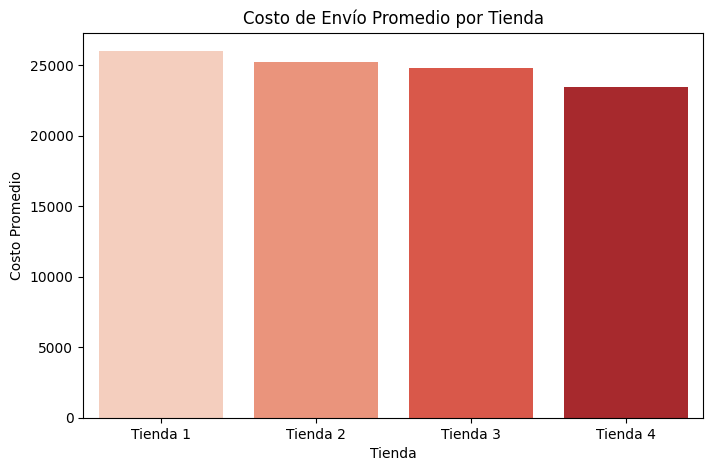

In [11]:
envio_promedio = df_total.groupby('Tienda')['Costo de envío'].mean().reset_index()
envio_promedio = envio_promedio.sort_values(by='Costo de envío', ascending=False)

print(envio_promedio)

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=envio_promedio, x='Tienda', y='Costo de envío', palette='Reds')
plt.title('Costo de Envío Promedio por Tienda')
plt.ylabel('Costo Promedio')
plt.show()

Reporte Ejecutiva para el Sr. Juan:

    Tras un análisis integral de las métricas de negocio, la
    recomendación estratégica es vender la Tienda 1 para financiar su
    nuevo proyecto.

    ¿Por qué?
    Si bien la Tienda 1 tiene el mayor volumen de facturación bruto,
    presenta graves ineficiencias operativas que la convierten en la
    sede menos escalable. Sus costos de envío promedio son los más
    altos de toda la red ($26,018), lo que reduce drásticamente su
    margen de ganancia real. Además, reporta la peor calificación de
    satisfacción al cliente (3.97 estrellas). Deshacerse de esta sede
    no solo le dará el capital necesario para su nuevo emprendimiento
    (dado su alto valor comercial), sino que liberará a la marca
    Alura Store de su sucursal más costosa de mantener y con peor
    reputación.